X.shape: (1000, 2)
y.shape: (1000,)


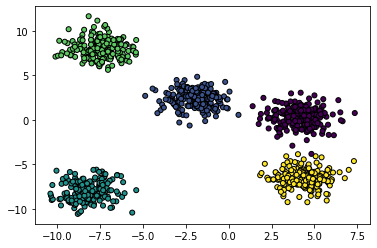

In [1]:
## Generate Some Random Data
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

num_centers = 5

X, y = make_blobs(n_samples=1000,  n_features=2, centers=num_centers)

print ('X.shape:', X.shape)
print ('y.shape:', y.shape)

# note the color coding of clusters
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [2]:
from sklearn.cluster import KMeans
import numpy as np

## TODO: number of clusters should equal to 'num_centers'
## but let's start with a mis-match:  -1, +1,  0
#k = num_centers - 1
#k = num_centers + 1
k = num_centers

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# now kmeans will predict clusters
y_pred = kmeans.predict(X)
print ('k:', k, ', wssse:', kmeans.inertia_)
print ('predicted y_pred (10) = ', np.random.choice(y_pred, 10))
print ("cluster centers:\n", kmeans.cluster_centers_)

k: 5 , wssse: 1973.531632888498
predicted y_pred (10) =  [0 2 4 3 3 1 1 2 1 0]
cluster centers:
 [[-7.51128529  8.04740411]
 [ 4.34187388 -6.50675367]
 [-8.18293391 -7.95738352]
 [-1.89785223  2.31752341]
 [ 4.10904363  0.31794927]]


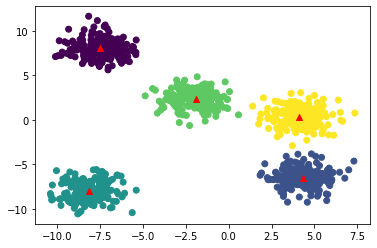

In [3]:
## plot kmeans predicted results

## now observe the color coding of clusters
## do they match?
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:][0:,0], kmeans.cluster_centers_[:][0:,1], marker='^', c='red')

k=2,  wssse=36640.149287076274
k=3,  wssse=13045.440463782852
k=4,  wssse=5924.662374725639
k=5,  wssse=1973.5316328884978
k=6,  wssse=1832.3549830779666
k=7,  wssse=1696.3472280104259


<AxesSubplot:xlabel='k'>

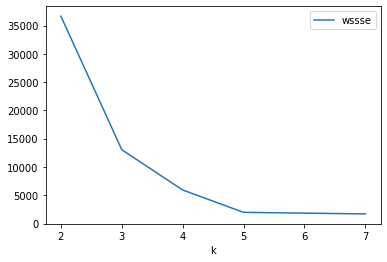

In [4]:
#WSSSE
#let's iterate over some Ks

kvals = []
wssses = []

for k in range(2, num_centers + 3):
    kmeans = KMeans(n_clusters=k, random_state=0)
    model = kmeans.fit(X)
    wssse = model.inertia_
    print ("k={},  wssse={}".format(k,wssse))
    kvals.append(k)
    wssses.append(wssse)
import pandas as pd

df_wssse = pd.DataFrame({'k': kvals, 'wssse':wssses})
df_wssse
df_wssse.plot(x="k")

silhoutte_score :  0.7558643810932364
silhoutte_score :  0.44447958927456066
silhoutte_score :  0.6382670696185853
silhoutte_score :  0.6712042190249237
silhoutte_score :  0.7558643810932364
silhoutte_score :  0.6517427546340862
silhoutte_score :  0.5579723962010285


<AxesSubplot:xlabel='k'>

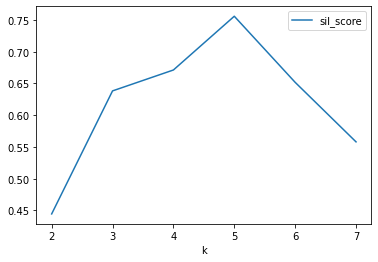

In [5]:
"""
Silhouette Score
Silhouette score ranges from -1 to +1.
Lower the values the worse performance
Scores close to 0 will indicate overlapping clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
"""
from  sklearn.metrics import silhouette_score

sil_score = silhouette_score (X, y_pred)

print ("silhoutte_score : ", sil_score)
# Let's loop through a few ranges
sil_scores = []

for k in range(2, num_centers+3):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    sil_score = silhouette_score (X, y_pred)
    sil_scores.append(sil_score)
    print ("silhoutte_score : ", sil_score)
import pandas as pd

df_sil = pd.DataFrame({'k': kvals, 'sil_score':sil_scores})
df_sil
df_sil.plot(x="k")

calinski_harabasz_score :  6269.343741582356
calinski_harabasz_score :  794.682015157793
calinski_harabasz_score :  2016.481500702243
calinski_harabasz_score :  3356.2516219497275
calinski_harabasz_score :  8046.841861769277
calinski_harabasz_score :  6942.98002520161
calinski_harabasz_score :  6269.923368232632


<AxesSubplot:xlabel='k'>

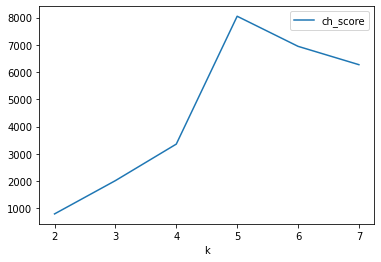

In [6]:
"""
Calinski-Harabasz Index
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
The score is fast to compute.
The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.
https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
"""
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score (X, y_pred)
print ("calinski_harabasz_score : ", ch_score)
# Let's loop through a few ranges

ch_scores = []

for k in range(2, num_centers+3):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    ch_score = calinski_harabasz_score (X, y_pred)
    ch_scores.append(ch_score)
    print ("calinski_harabasz_score : ", ch_score)
import pandas as pd

df_ch = pd.DataFrame({'k': kvals, 'ch_score':ch_scores})
df_ch
df_ch.plot(x="k")

From Silhouette Score, optimal k= 5
From Calinski-Harabasz, optimal k= 5


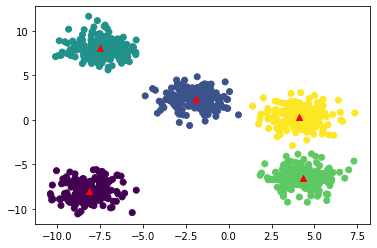

In [7]:
"""
Choose the Optimal K
From above experiments, choose a K that is scoring high.

For example k=4

And visualize the results
"""
import numpy as np

# using Silhouette Score
max_index_of_score = np.argmax(df_sil['sil_score'])
optimal_k = df_sil['k'].iloc[max_index_of_score]
print ("From Silhouette Score, optimal k=", optimal_k)

# from ch_scores
max_index_of_score = np.argmax(df_ch['ch_score'])
optimal_k = df_ch['k'].iloc[max_index_of_score]
print ("From Calinski-Harabasz, optimal k=", optimal_k)
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)

# now kmeans will predict clusters
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:][0:,0], kmeans.cluster_centers_[:][0:,1], marker='^', c='red')

k=2,  silhoutte_score=0.44447958927456066, calinski_harabasz_score=794.682015157793
k=3,  silhoutte_score=0.6382670696185853, calinski_harabasz_score=2016.481500702243
k=4,  silhoutte_score=0.6712042190249237, calinski_harabasz_score=3356.2516219497275
k=5,  silhoutte_score=0.7558643810932364, calinski_harabasz_score=8046.841861769279
k=6,  silhoutte_score=0.6517787317496934, calinski_harabasz_score=6942.255577368703


<AxesSubplot:xlabel='k'>

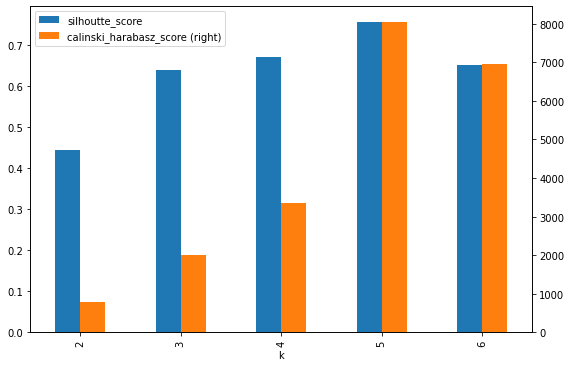

In [8]:
#Combine Scores
sil_scores = []
ch_scores = []

k_vals = (num_centers - 3,num_centers - 2, num_centers - 1, num_centers, num_centers + 1)

for k in k_vals:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    
    sil_score = silhouette_score (X, y_pred)
    sil_scores.append(sil_score)
    
    ch_score = calinski_harabasz_score (X, y_pred)
    ch_scores.append(ch_score)
    
    print ("k={},  silhoutte_score={}, calinski_harabasz_score={}".format(k,sil_score,ch_score ))
import pandas as pd

df = pd.DataFrame({'k': k_vals, 'silhoutte_score':sil_scores, 'calinski_harabasz_score':ch_scores})
df
%matplotlib inline
from matplotlib import pyplot

df.plot(x="k", y=["silhoutte_score", "calinski_harabasz_score"], kind="bar", 
        secondary_y=['calinski_harabasz_score'], figsize=(9, 6))